In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load the dataset from sklearn

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# create a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:
# add the target variable to the dataframe
df['progression'] = diabetes.target
# check the shape of the dataframe
df.shape

(442, 11)

In [3]:
# lets use bmi as the feature to predict the progression of diabetes

# create the feature and target variable
X = df[['bmi']] #note that we are using a 2D array
y = df['progression']

In [4]:
# load linear regression model from sklearn

from sklearn.linear_model import LinearRegression
# create an instance of the model
lr = LinearRegression()

In [5]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 42 is specific seed value

In [6]:
# fit the model on the training data
lr.fit(X_train, y_train) 
# so regressor worked on the training data and learned the relationship between bmi and progression

LinearRegression()

In [7]:
# make some predictions
y_pred = lr.predict(X_test) # notice we do them on test

In [8]:
# check the accuracy of the model
lr.score(X_test, y_test)

0.23335039815872138

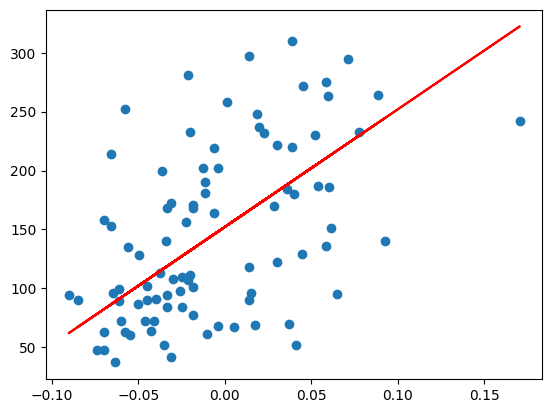

In [9]:
# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 4061.8259284949268
Mean Absolute Error: 52.259976445345536
R2 Score: 0.23335039815872138


In [11]:
# get the intercept and coefficients
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: 152.00335421448167
Coefficients: [998.57768914]


In [12]:
# r 2 score
print('R2 Score:', r2_score(y_test, y_pred)) # so comparing test and predicted values
# so not shocking that the r2 score is 1 because we used linear function to generate the data
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
# again almost no error because we used linear function to generate the data

R2 Score: 0.23335039815872138
Root Mean Squared Error: 63.73245584860925


In [13]:
# lets make a function that will take dataframe and features as input and return r2 score and root mean squared error

def get_r2_rmse(df, features):
    X = df[features] #note that we are using a 2D array
    y = df['progression'] # TODO pass argument for target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression() # TODO pass regression model as argument
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse # we are throwing away the intercept and coefficients and the model

In [14]:
# lets try our function on the diabetes dataset
# we will use all combinations of s3 s5 and bmi

combins = [['s3'], ['s5'], ['bmi'], ['s3', 's5'], ['s3', 'bmi'], ['s5', 'bmi'], ['s3', 's5', 'bmi']]
# we could have done this using itertools
# import itertools
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 1)) # 1 means 1 feature
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 2)) # all combinations of 2 features
# combins = list(itertools.combinations(['s3', 's5', 'bmi'], 3)) # all combinations of 3 features

r2_list = []
rmse_list = []
for comb in combins:
    r2, rmse = get_r2_rmse(df, comb)
    print('Features:', comb, 'R2 Score:', r2, 'Root Mean Squared Error:', rmse)
    r2_list.append(r2)
    rmse_list.append(rmse)

# lets plot the r2 score and root mean squared error

Features: ['s3'] R2 Score: 0.18512226947901855 Root Mean Squared Error: 65.70651316868806
Features: ['s5'] R2 Score: 0.38269153958537394 Root Mean Squared Error: 57.18910647072432
Features: ['bmi'] R2 Score: 0.23335039815872138 Root Mean Squared Error: 63.73245584860925
Features: ['s3', 's5'] R2 Score: 0.4039957700968644 Root Mean Squared Error: 56.193601528862594
Features: ['s3', 'bmi'] R2 Score: 0.2897606403164088 Root Mean Squared Error: 61.342936882520796
Features: ['s5', 'bmi'] R2 Score: 0.4522925957397932 Root Mean Squared Error: 53.8687009455092
Features: ['s3', 's5', 'bmi'] R2 Score: 0.4556054836719434 Root Mean Squared Error: 53.70553750374669


In [15]:
# lets create a dataframe with the results
results_df = pd.DataFrame({'features': combins, 'r2': r2_list, 'rmse': rmse_list})
results_df

,features,r2,rmse
0,[s3],0.185122,65.706513
1,[s5],0.382692,57.189106
2,[bmi],0.233350,63.732456
3,"[s3, s5]",0.403996,56.193602
4,"[s3, bmi]",0.289761,61.342937
5,"[s5, bmi]",0.452293,53.868701
6,"[s3, s5, bmi]",0.455605,53.705538


In [16]:
# convert features column to string
# so we can use it as a label
# i used a anonymous function to do this - so we can apply it to each row
# i made a tiny lambda fuction to do this

results_df['features_str'] = results_df['features'].apply(lambda x: "_".join(x))
# convert features column to string
# so we can use it as a label
# i could pass a premade function such as str to do this as well
results_df['simple_str'] = results_df['features'].apply(str)	
results_df

,features,r2,rmse,features_str,simple_str
0,[s3],0.185122,65.706513,s3,['s3']
1,[s5],0.382692,57.189106,s5,['s5']
2,[bmi],0.233350,63.732456,bmi,['bmi']
3,"[s3, s5]",0.403996,56.193602,s3_s5,"['s3', 's5']"
4,"[s3, bmi]",0.289761,61.342937,s3_bmi,"['s3', 'bmi']"
5,"[s5, bmi]",0.452293,53.868701,s5_bmi,"['s5', 'bmi']"
6,"[s3, s5, bmi]",0.455605,53.705538,s3_s5_bmi,"['s3', 's5', 'bmi']"


Text(0.5, 1.0, 'R2 Score for Different Features')

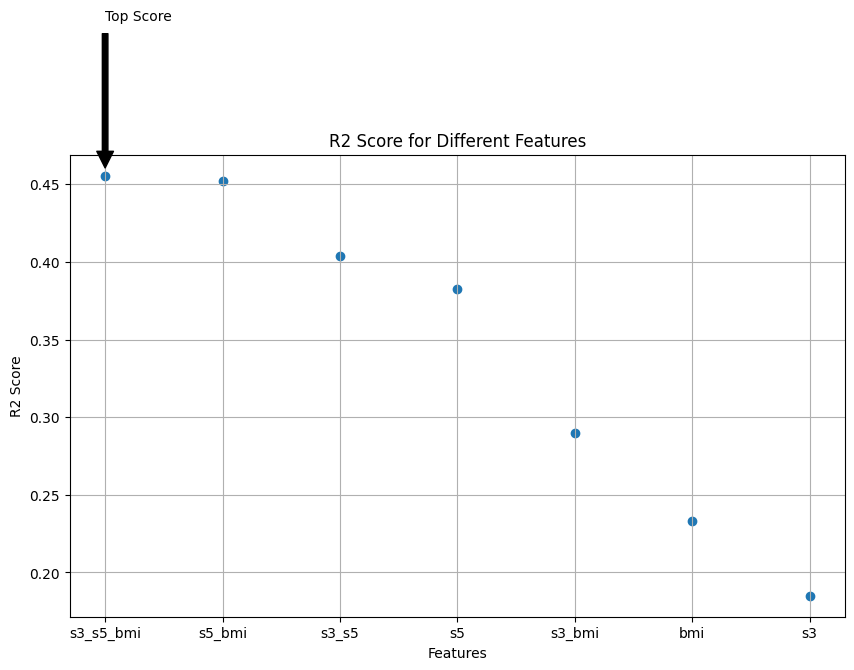

In [17]:
# lets plot the r2 score and root mean squared error
# we will use the results dataframe
# lets sort the dataframe by r2 score
results_df.sort_values(by='r2', ascending=False, inplace=True)

# lets plot the r2 score
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['r2'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']), xytext=(results_df.iloc[0]['features_str'], results_df.iloc[0]['r2']+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Features')

# lines are not relevant here because x axis is categorical
# we are trying to see which combination of features gives the best r2 score

Text(0.5, 1.0, 'Root Mean Squared Error for Different Features')

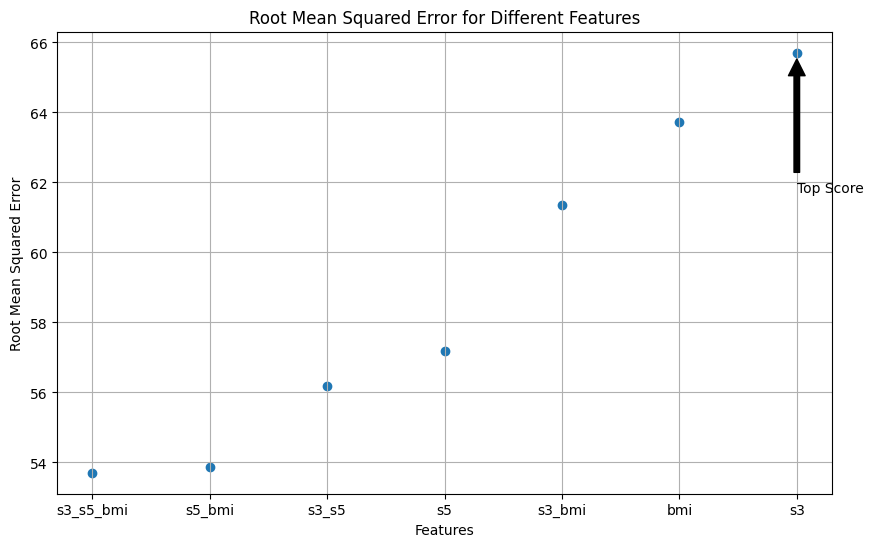

In [18]:
# lets plot the root mean squared error in the same way
# we will use the results dataframe

# lets sort the dataframe by root mean squared error
results_df.sort_values(by='rmse', ascending=True, inplace=True)

# lets plot the root mean squared error
plt.figure(figsize=(10, 6))
plt.scatter(results_df['features_str'], results_df['rmse'], marker='o')
# add grid
plt.grid()
# add arrow to top score
# i got the location of the top score using the iloc method since first row is the top score
# then added a little bit of offset to the x and y values
plt.annotate('Top Score', xy=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']), xytext=(results_df.iloc[-1]['features_str'], results_df.iloc[-1]['rmse']-4), arrowprops=dict(facecolor='black', shrink=0.05))
# add graph labels and title
plt.xlabel('Features')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Features')


In [19]:
# TODO use a different regression model
# available models in sklearn
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# maybe Lasso or Ridge regression

In [20]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Lasso model

In [21]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.1)

In [56]:
x2 = df[['bp']] 
y2 = df['progression']

In [57]:
# split the data into train and test set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42) # 42 is specific seed value

In [58]:
# fit the model on the training data
lass.fit(x2_train, y2_train) 

Lasso(alpha=0.1)

In [59]:
# make some predictions
y2_pred = lass.predict(x2_test) # notice we do them on test

In [60]:
# check the accuracy of the model
lass.score(x2_test, y2_test)

0.17295733141229486

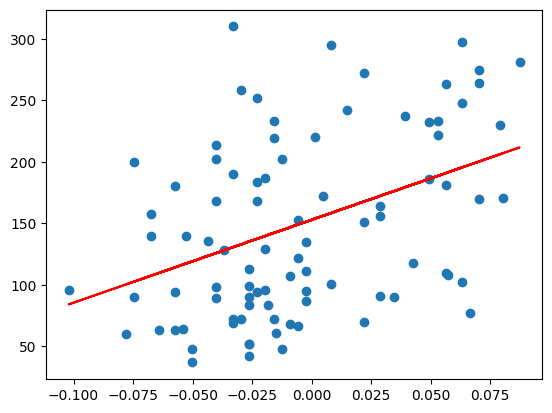

In [61]:
# plot
plt.scatter(x2_test, y2_test)
plt.plot(x2_test, y2_pred, color='red')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred))
print('Mean Absolute Error:', mean_absolute_error(y2_test, y2_pred))
print('R2 Score:', r2_score(y2_test, y2_pred))

Mean Squared Error: 4381.7975606757855
Mean Absolute Error: 57.31864379994775
R2 Score: 0.17295733141229486


In [42]:
# try california housing dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
# import fetch_california_housing from sklearn.datasets
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
# lets fit  and s5 as the features to predict the progression of diabetes

# create the feature and target variable
x3 = california_df[['AveRooms', 'AveBedrms']] 
y3 = california_df['target']

# split the data into train and test set
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [53]:
# create an instance of the model

lr2 = LinearRegression()
# fit the model on the training data
lr2.fit(x3_train, y3_train)

# make some predictions
y3_pred = lr2.predict(x3_test)

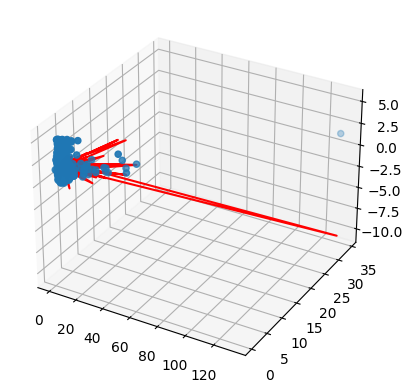

In [54]:
# 3d plot the regression line

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3_test['AveRooms'], x3_test['AveBedrms'], y3_test)
ax.plot(x3_test['AveRooms'], x3_test['AveBedrms'], y3_pred, color='red')
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y3_test, y3_pred))
print('Mean Absolute Error:', mean_absolute_error(y3_test, y3_pred))
print('R2 Score:', r2_score(y3_test, y3_pred))

Mean Squared Error: 1.1719222808390148
Mean Absolute Error: 0.8395605921061553
R2 Score: 0.10568204255421842


In [65]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
